Single condition single muscle rest calculation

In [1]:
# THE FINAL ONE
import neurokit2 as nk
from scipy import interpolate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from scipy.signal import find_peaks

In [2]:
# Get data
cond=4
data = pd.read_csv('C:/Users/KIM/Downloads/Andres Valverde/Subject 1/Subj1_Data_2502/Subj1_'+str(cond)+'_2502.csv')

emg = data["Posterior deltoid: EMG 2"]
ang_vel = data["Brachioradialis: GYRO.X 7"]

#14819 of 126430
ang_vel=ang_vel[0:14818]  



126421

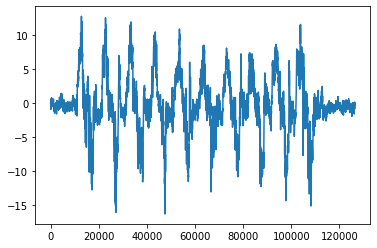

In [3]:
orange=np.arange(0,14818)
f=interpolate.interp1d(orange,ang_vel)
nrange=np.arange(0,14817,(14818/126429))
scaled_ang_vel=f(nrange)
plt.plot(scaled_ang_vel)
len(scaled_ang_vel)

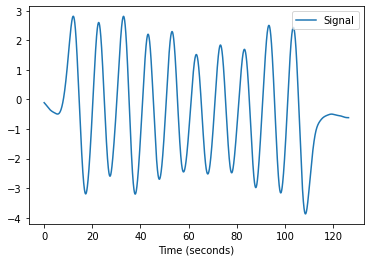

In [24]:
#Clean angular velocity data

Clean_Ang_vel = nk.signal_filter(scaled_ang_vel,highcut=0.1,sampling_rate=1000)

#Plot signal
nk.signal_plot(Clean_Ang_vel,sampling_rate=1000)

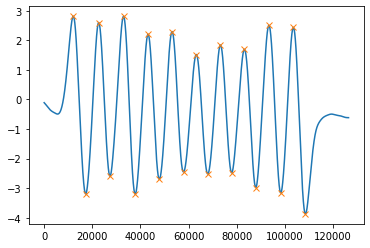

27339

In [25]:

peaks, _ = find_peaks(abs(Clean_Ang_vel), height=1.0, distance=1000)
plt.plot(Clean_Ang_vel)
plt.plot(peaks, Clean_Ang_vel[peaks], "x")
plt.show()

peaks[3]

IndexError: index 17 is out of bounds for axis 0 with size 17

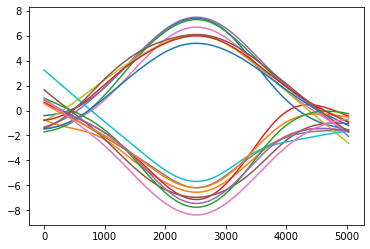

In [21]:
#taking both sides of the peak, (half of total movement duration on either side)

motion=[]
 #this example is 2 seconds so 1*1257Hz points on either side should be movement
for i in np.arange(0,20):
    peak=int(peaks[i])
    start=int(peak-1257*(cond/2))
    end=int(peak+1257*(cond/2))
    motion.append(Clean_Ang_vel[start:end])
    plt.plot(motion[i])




x axis is not in ms, it's in datapoints so don't panic

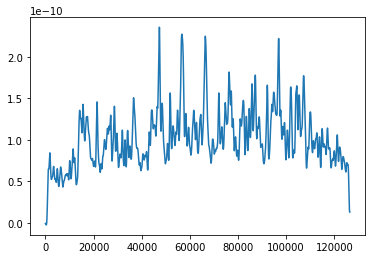

In [ ]:
signals, info = nk.emg_process(emg, sampling_rate=1259)
cleaned = nk.emg_clean(emg, sampling_rate=1259)
        
        #editing the below line
cleaned=nk.emg_amplitude(cleaned)
cleaned=nk.signal_filter(cleaned,highcut=1,sampling_rate=1000)
plt.plot(cleaned)

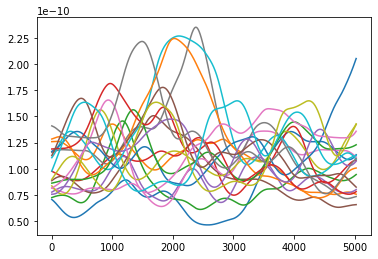

In [ ]:
emg_motion=[]
 #this example is 2 seconds so 1*1257Hz points on either side should be movement
for i in np.arange(0,20):
    peak=int(peaks[i])
    start=int(peak-1257*(cond/2))
    end=int(peak+1257*(cond/2))
    emg_motion.append(cleaned[start:end])
    plt.plot(emg_motion[i])
aaans=np.average(emg_motion)

every 10 movements (back + forth)'s average emg activation is taken